In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

from pystac_client import Client
import planetary_computer

import odc.stac
from IPython.display import Image

In [2]:
# GET THOMAS FIRE PERIMETER
# https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/explore?location=34.550526%2C-119.315739%2C10.67
# pd.set_option("display.max.columns", None)

fires = gpd.read_file('California_Fire_Perimeters__all_.shp')
fires17 = fires[fires['YEAR_']=='2017']
thomas_fire = fires[(fires['FIRE_NAME'] == 'THOMAS')& (fires['YEAR_']=='2017')]
fires17

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,14.0,...,10.043819,per walked track,NaN,NaN,NaN,NaN,2010,1246.055781,5.947367e+04,"POLYGON ((-13229812.974 4046876.486, -13229786..."
19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,14.0,...,1.190109,Final Walked track. Small spot to the north east,NaN,NaN,NaN,NaN,2010,561.418202,7.081369e+03,"POLYGON ((-13286872.985 4074523.355, -13286895..."
19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,14.0,...,47.194027,NaN,NaN,NaN,NaN,NaN,2010,2587.259697,2.799118e+05,"POLYGON ((-13244637.580 4056332.530, -13244620..."
19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,14.0,...,1.158548,GPS track,NaN,NaN,NaN,NaN,2010,501.178102,6.859665e+03,"POLYGON ((-13229521.754 4046254.111, -13229510..."
19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,14.0,...,2.893327,Rough per description. waiting for walked GPS...,NaN,NaN,NaN,NaN,2010,484.388887,1.713301e+04,"POLYGON ((-13229663.036 4046858.853, -13229667..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21902,43888,2017,CA,FWS,BRR,STUBBLE,00002027,2017-07-27,2017-07-27,9.0,...,1.526605,LAH8,NaN,NaN,96228AF8-4967-4AE1-B2CE-CDAC6C8B06EF,NaN,2010,1259.808533,9.217652e+03,"POLYGON ((-13297381.554 4157213.882, -13297362..."
21903,43889,2017,CA,CCO,KRN,HUDSON,00027936,2017-07-18,2017-07-18,14.0,...,1175.391479,K506.,NaN,NaN,5E0922CD-59F0-40AE-B38B-96C556E09B21,NaN,2010,13992.274756,7.096378e+06,"POLYGON ((-13299295.171 4155414.960, -13299298..."
21904,43890,2017,CA,FWS,ESR,HARKIN,00001704,2017-06-28,2017-06-28,4.0,...,2.568609,K3JJ.,NaN,NaN,52A10DF9-1856-463C-9026-F2E0CA972B75,NaN,2010,681.926849,1.629225e+04,"POLYGON ((-13559512.982 4427451.985, -13559502..."
21905,43891,2017,CA,CDF,LMU,JONES,00000268,2017-06-03,2017-06-03,7.0,...,42.079288,K1F9.,NaN,NaN,DD6A07B8-BC55-4FA2-82D5-2F1B01EDCFE9,NaN,2010,2977.885260,3.029834e+05,"POLYGON ((-13418484.047 5073288.061, -13418471..."


In [3]:
fires17 = fires17.reset_index()
fires17.to_file('California_Fire_Perimeters_2017.shp')

In [4]:
us = gpd.read_file('cb_2021_us_nation_5m.shp')
us

,AFFGEOID,GEOID,NAME,geometry
0,0100000US,US,United States,"MULTIPOLYGON (((179.48246 51.98283, 179.48657 ..."


In [5]:
# GET ITEM
# https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#Example-Notebook

# access catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# Temporal range of interest
time_range = "2018-01-12/2018-01-31"

bbox = [-119.70608227128903, 34.42041139020533,-119.6967885126002,34.426300194372274]

search = catalog.search(
    collections=["landsat-c2-l2"],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()
print(f"Returned {len(items)} Items")

item = items[0]
item.properties

Returned 1 Items


{'gsd': 30,
 'created': '2022-05-06T17:38:43.110885Z',
 'sci:doi': '10.5066/P9OGBGM6',
 'datetime': '2018-01-26T18:34:27.316123Z',
 'platform': 'landsat-8',
 'proj:epsg': 32611,
 'proj:shape': [7961, 7831],
 'description': 'Landsat Collection 2 Level-2',
 'instruments': ['oli', 'tirs'],
 'eo:cloud_cover': 4.93,
 'proj:transform': [30.0, 0.0, 121185.0, 0.0, -30.0, 3952515.0],
 'view:off_nadir': 0,
 'landsat:wrs_row': '036',
 'landsat:scene_id': 'LC80420362018026LGN00',
 'landsat:wrs_path': '042',
 'landsat:wrs_type': '2',
 'view:sun_azimuth': 152.53102241,
 'landsat:correction': 'L2SP',
 'view:sun_elevation': 31.97460652,
 'landsat:cloud_cover_land': 8.14,
 'landsat:collection_number': '02',
 'landsat:collection_category': 'T1'}

In [6]:
# PRINT ASSETS
max_key_length = len(max(item.assets, key=len))
for key in item.assets.keys():
    print(f"{key.rjust(max_key_length)} -- {item.assets[key].title}")

              qa -- Surface Temperature Quality Assessment Band
             ang -- Angle Coefficients File
             red -- Red Band
            blue -- Blue Band
            drad -- Downwelled Radiance Band
            emis -- Emissivity Band
            emsd -- Emissivity Standard Deviation Band
            trad -- Thermal Radiance Band
            urad -- Upwelled Radiance Band
           atran -- Atmospheric Transmittance Band
           cdist -- Cloud Distance Band
           green -- Green Band
           nir08 -- Near Infrared Band 0.8
          lwir11 -- Surface Temperature Band
          swir16 -- Short-wave Infrared Band 1.6
          swir22 -- Short-wave Infrared Band 2.2
         coastal -- Coastal/Aerosol Band
         mtl.txt -- Product Metadata File (txt)
         mtl.xml -- Product Metadata File (xml)
        mtl.json -- Product Metadata File (json)
        qa_pixel -- Pixel Quality Assessment Band
       qa_radsat -- Radiometric Saturation and Terrain Occlusion Qua

In [7]:
Image(url=item.assets["rendered_preview"].href, width=500)

In [8]:
# bands 7, 5, and 4
# https://www.usgs.gov/media/images/common-landsat-band-combinations
# https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites
bands_of_interest = ['red','green','blue','nir08','swir22']
raw_data = odc.stac.stac_load(
    [item], bands=bands_of_interest
).isel(time=0)
raw_data

<xarray.Dataset>
Dimensions:      (y: 7962, x: 7832)
Coordinates:
  * y            (y) float64 3.953e+06 3.952e+06 ... 3.714e+06 3.714e+06
  * x            (x) float64 1.212e+05 1.212e+05 ... 3.561e+05 3.561e+05
    spatial_ref  int32 32611
    time         datetime64[ns] 2018-01-26T18:34:27.316123
Data variables:
    red          (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    green        (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    blue         (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nir08        (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    swir22       (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

In [11]:
raster_us = raw_data.rio.clip(us.to_crs(raw_data.rio.crs)['geometry'])

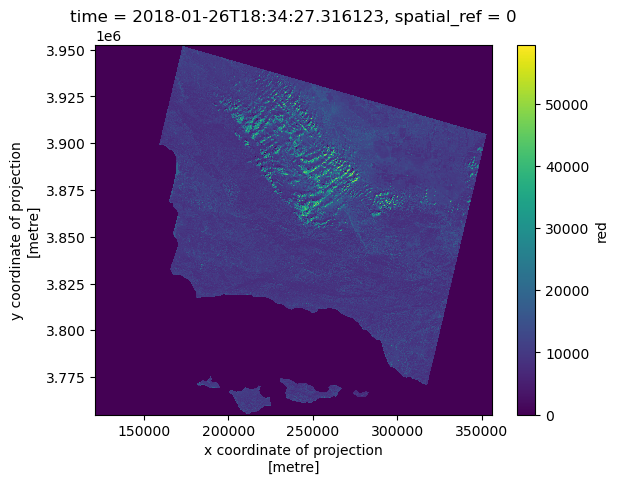

In [12]:
raster_us.red.plot()

In [13]:
raster_us.to_netcdf('landsat8-2018-01-26-sb-simplified.nc')

In [16]:
data = rioxr.open_rasterio('landsat8-2018-01-26-sb-simplified.nc')
data = data.squeeze().drop('band')
data

<xarray.Dataset>
Dimensions:      (x: 7832, y: 6585)
Coordinates:
  * x            (x) float64 1.212e+05 1.212e+05 ... 3.561e+05 3.561e+05
  * y            (y) float64 3.953e+06 3.952e+06 ... 3.755e+06 3.755e+06
    spatial_ref  int64 0
Data variables:
    red          (y, x) uint16 ...
    green        (y, x) uint16 ...
    blue         (y, x) uint16 ...
    nir08        (y, x) uint16 ...
    swir22       (y, x) uint16 ...

In [7]:
for band in bands_of_interest:
    print(item.assets[band].extra_fields['raster:bands'][0], '\n')

# scale, see: 
# https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products
scale = item.assets[band].extra_fields['raster:bands'][0]['scale']

{'scale': 2.75e-05, 'nodata': 0, 'offset': -0.2, 'data_type': 'uint16', 'spatial_resolution': 30} 

{'scale': 2.75e-05, 'nodata': 0, 'offset': -0.2, 'data_type': 'uint16', 'spatial_resolution': 30} 

{'scale': 2.75e-05, 'nodata': 0, 'offset': -0.2, 'data_type': 'uint16', 'spatial_resolution': 30} 



In [10]:
data = xr.Dataset()

In [15]:
for band in bands_of_interest:
    data[band] = raw_data[band].where(raw_data[band] != 0)
    data[band] = data[band]*scale -0.2

In [16]:
data['red']

<xarray.DataArray 'red' (y: 7962, x: 7832)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y            (y) float64 3.953e+06 3.952e+06 ... 3.714e+06 3.714e+06
  * x            (x) float64 1.212e+05 1.212e+05 ... 3.561e+05 3.561e+05
    spatial_ref  int32 32611
    time         datetime64[ns] 2018-01-26T18:34:27.316123

In [19]:
for band in bands_of_interest:
    print(f"min: {data[band].min().item()}, max: {data[band].max().item()}")

min: -0.007802500000000018, max: 1.5999850000000002
min: -0.1998625, max: 1.4715325000000001
min: -0.1999725, max: 1.4371025000000002


In [48]:
for band in bands_of_interest:
    data[band] = data[band].where((data[band]> 0) & (data[band]<=1))

/srv/conda/envs/notebook/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


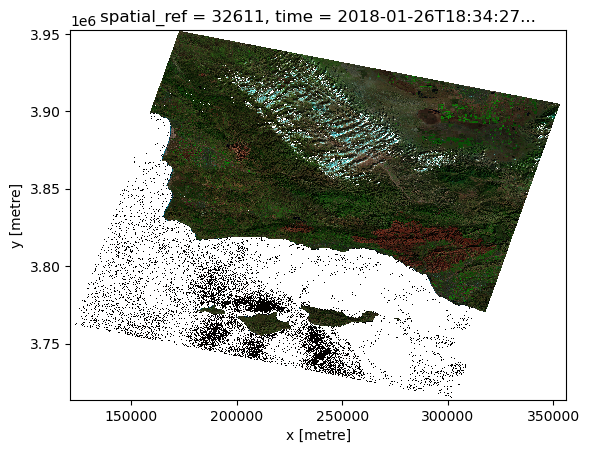

In [49]:
data[bands_of_interest].to_array().plot.imshow()

In [23]:
thomas_fire = thomas_fire.to_crs(data.rio.crs) 

/srv/conda/envs/notebook/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


<Axes: title={'center': 'spatial_ref = 32611, time = 2018-01-26T18:34:27...'}, xlabel='x [metre]', ylabel='y [metre]'>

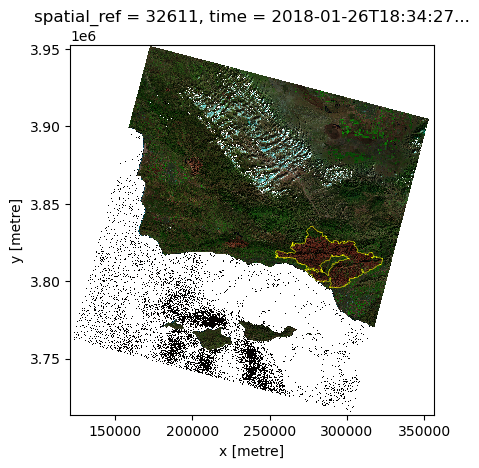

In [25]:
fig, ax = plt.subplots()
data[bands_of_interest].to_array().plot.imshow(ax=ax)

thomas_fire.plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.3)

In [26]:
thomas_fire.bounds

,minx,miny,maxx,maxy
20274,253728.216889,3.795467e+06,323152.253155,3.835517e+06


In [52]:
raster_us = data.rio.clip(us.to_crs(data.rio.crs)['geometry'])


/srv/conda/envs/notebook/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


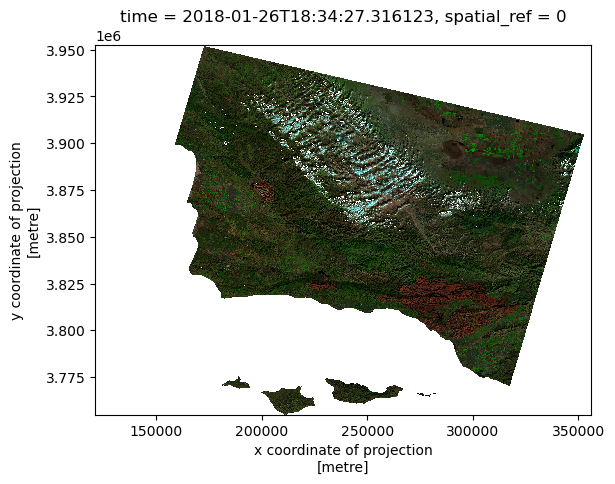

In [53]:
raster_us[bands_of_interest].to_array().plot.imshow()

In [58]:
type(raster_us.red[0,0].item())

float

In [60]:
raster_us = raster_us.fillna(0)

<Axes: title={'center': 'time = 2018-01-26T18:34:27.316123, spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

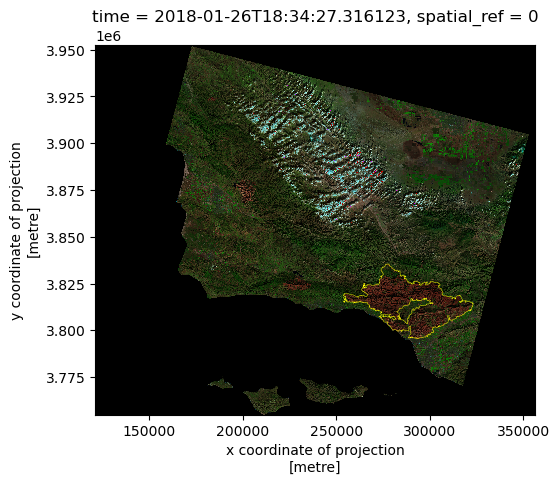

In [62]:
fig, ax = plt.subplots()
raster_us[bands_of_interest].to_array().plot.imshow(ax=ax)

thomas_fire.plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.3)